# Apriori aasima

In [ ]:
%load_ext autoreload
%autoreload 2

In [1]:
from V31Apriori import V31
import pandas as pd
pd.set_option('display.max_colwidth', 0)

v31 = V31(
    "/Users/rabauti/repos/tu/estnltk/syntax_experiments/syntax_experiments__subcat/v31_verb_transactions/v31_koondkorpus_sentences_verb_pattern_obl_20240524-153036.db",
    form_treshold_percent = 20,
    form_treshold_count = 5,
    apriori_min_support=0.05,
    apriori_treshold_delta = 0.03,
    apriori_treshold_percent=50,
    datarows_treshold=100000
    )

************************************************ aasima   ************************************************
Ridu analüüsimiseks: 160
apriori min_support: 0.05
delta: 0.03
percent: 50


,support,itemlists,example1,example2,example3,drop,drop_reason,length
3,0.78125,"[(NSUBJ, nom, , )]",ta,leinatamm,reisikaaslane,False,,1
4,0.29375,"[(OBJ, part, , )]",meid,meid,ütlusi,False,,1
10,0.21875,"[(NSUBJ, nom, , ), (OBJ, part, , )]",mis identiteeti,leemets poliitikuid,ta mida,False,,2
1,0.19375,"[(ADVMOD, , , )]",ainult,sõbralikult,vastastikku,False,,1
0,0.13125,"[(ADVCL, , , )]",tassides,sai,lonksates,True,(row 8) delta: abs(0.1187 - 0.1313) < 0.03 %: (0.1313-0.1187)/0.1187*100<50,1
8,0.11875,"[(NSUBJ, nom, , ), (ADVCL, , , )]",need viis,vormikandjad käis,poemüüjad ostis,False,,2
9,0.11875,"[(NSUBJ, nom, , ), (ADVMOD, , , )]",vennad omavahel,tuletõrjujad omavahel,tuletõrjujad omavahel,False,,2
2,0.05625,"[(CCOMP, , , )]",käib,langeski,ostad,False,,1
7,0.05625,"[(OBL, kom, , )]",innuga,meestega,meestega,False,,1
5,0.05000,"[(OBL, ad, , )]",pinnal,arutelul,pinnal,False,,1


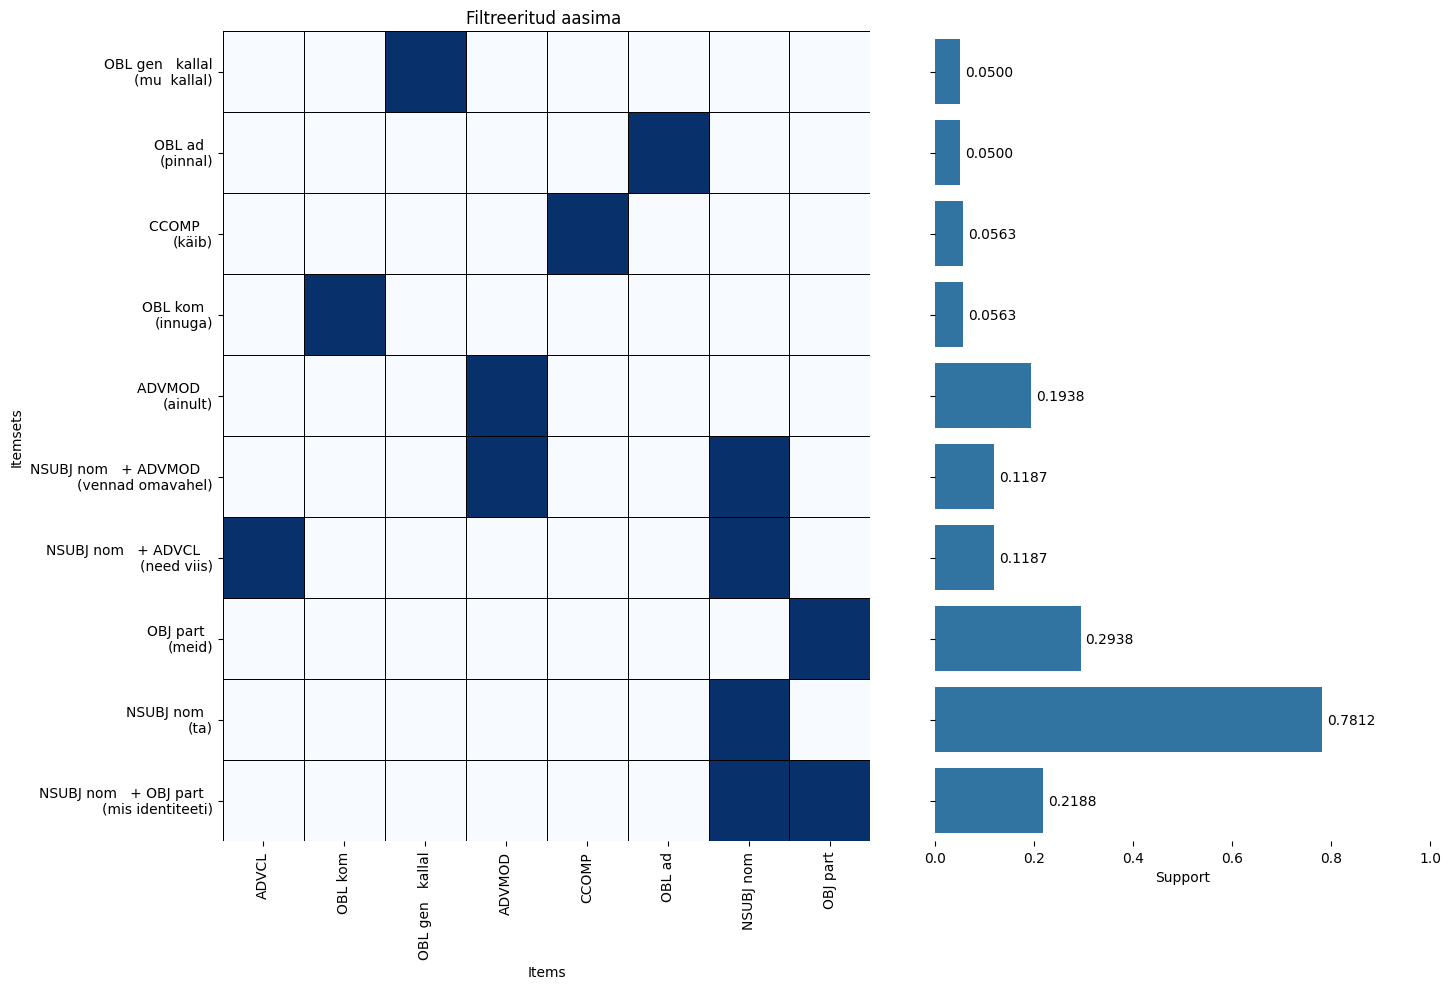

CPU times: user 5.91 s, sys: 2.26 s, total: 8.17 s
Wall time: 14.8 s


In [2]:
%%time
result = v31.make_all(verb='aasima', verb_compound='', examples=True)


## pikem viis

### aasima + obl-p

In [17]:
VERB = 'aasima'
VERB_COMPOUND = ''

In [18]:
# transaktsioonid
transactions = v31.get_transactions(verb=VERB, verb_compound=VERB_COMPOUND)

In [19]:
len(transactions)


160

In [22]:
# transactions on juba "puhastatud", _raw_transactions sisaldab rohkem infot
raw = v31._raw_transactions

In [28]:
obl_part_count = 0
for key, kids in raw.items():
    
    for kid in kids:
        if kid['deprel'] == 'OBL' and kid['case'] == 'part':
            obl_part_count += 1
            display(key, kids)
            break
display(obl_part_count)
            
   

12316670

[{'deprel': 'OBL',
  'case': 'part',
  'frequent_form': 'aastat',
  'obl_case': ' tagasi',
  'loc': 2},
 {'deprel': 'OBJ',
  'case': 'part',
  'frequent_form': 'jäälepudenemist',
  'obl_case': '',
  'loc': 11},
 {'deprel': 'NSUBJ',
  'case': 'nom',
  'frequent_form': 'press',
  'obl_case': '',
  'loc': 15}]

14190923

[{'deprel': 'NSUBJ',
  'case': 'nom',
  'frequent_form': 'sina',
  'obl_case': '',
  'loc': 33},
 {'deprel': 'OBJ',
  'case': 'part',
  'frequent_form': 'mind',
  'obl_case': '',
  'loc': 34},
 {'deprel': 'OBL',
  'case': 'kom',
  'frequent_form': 'vitsaga',
  'obl_case': '',
  'loc': 35},
 {'deprel': 'OBL',
  'case': 'part',
  'frequent_form': 'karja',
  'obl_case': ' tagasi',
  'loc': 36},
 {'deprel': 'XCOMP',
  'case': '',
  'frequent_form': 'näha',
  'obl_case': '',
  'loc': 46}]

15384236

[{'deprel': 'OBL',
  'case': 'part',
  'frequent_form': 'lihvimist',
  'obl_case': ' enne',
  'loc': 3},
 {'deprel': 'NSUBJ',
  'case': 'nom',
  'frequent_form': 'erki',
  'obl_case': '',
  'loc': 5},
 {'deprel': 'NSUBJ',
  'case': 'nom',
  'frequent_form': 'indrek',
  'obl_case': '',
  'loc': 7}]

3

## viima kust - kuhu

In [31]:
# transaktsioonid
viima_transactions = v31.get_transactions(verb='viima', verb_compound='')
tansactions_raw = v31._raw_transactions

In [32]:
len(tansactions_raw)

50174

In [34]:
viima_kust_kuhu = 0
for key, kids in tansactions_raw.items():
    abl = False
    all = False
    
    for kid in kids:
        if kid['deprel'] == 'OBL' and kid['case'] == 'abl':
            abl = 1
        if kid['deprel'] == 'OBL' and kid['case'] == 'all':
            all = 1
    if abl and all:
        viima_kust_kuhu += 1
        #display(key, kids)
        
            
    
display(viima_kust_kuhu)

134